###Подготовка данных для НС. Разметка

###Необходимые ресурсы

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from google.colab import files
import zipfile
import io, shutil


###Загрузка обучающей выборки

In [ ]:
# загрузка содержания Google диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# загрузим файл Dataset с Google диска
!cp '/content/drive/MyDrive/SignsTexts/Dataset.zip' Dataset.zip

In [ ]:
# проверим, что файлы загрузились
!ls

Dataset.zip  drive  sample_data


In [ ]:
# распакуем датасет
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/0001.jpeg       
  inflating: Dataset/0002.jpeg       
  inflating: Dataset/0003.jpeg       
  inflating: Dataset/0004.jpeg       
  inflating: Dataset/0005.jpeg       
  inflating: Dataset/0006.jpeg       
  inflating: Dataset/0007.jpeg       
  inflating: Dataset/0008.jpeg       
  inflating: Dataset/0009.jpeg       
  inflating: Dataset/0010.jpeg       
  inflating: Dataset/0011.jpeg       
  inflating: Dataset/0012.jpeg       
  inflating: Dataset/0013.jpeg       
  inflating: Dataset/0014.jpeg       
  inflating: Dataset/0015.jpeg       
  inflating: Dataset/0016.jpeg       
  inflating: Dataset/0017.jpeg       
  inflating: Dataset/0018.jpeg       
  inflating: Dataset/0019.jpeg       
  inflating: Dataset/0020.jpeg       
  inflating: Dataset/0021.jpeg       
  inflating: Dataset/Sign1.jpg       
  inflating: Dataset/Sign2.jpg       
  inflating: Dataset/text1.jpg       
  inflating: Dataset/text2.jpg       
  infl

In [ ]:
# подсчитаем количество файлов в датасете
!find /content/Dataset -type f| wc -l

47


###Разметка
Определим изображение с подписью в категорию - 1, с текстом - в 0.

In [ ]:
filenames = os.listdir("../content/Dataset")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if 't' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'label': categories
})

In [ ]:
# посмотрим на первые 10 записей
df.head(10)

,filename,label
0,txt_st_0_8140.jpeg,0
1,0021.jpeg,1
2,0013.jpeg,1
3,text1.jpg,0
4,txt_st_0_8286.jpeg,0
5,txt_st_0_1062.jpeg,0
6,txt_st_0_2120.jpeg,0
7,0010.jpeg,1
8,0001.jpeg,1
9,0014.jpeg,1


In [ ]:
# общая информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  47 non-null     object
 1   label     47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


In [ ]:
# подсчитаем количество файлов с подписями
# так как колонка label состоит только их 0 и 1, то общая сумма = количеству изображений, определенных как подпись
df['label'].sum(axis=0)

23

###Посмотрим на распределение изображений

<Axes: xlabel='label'>

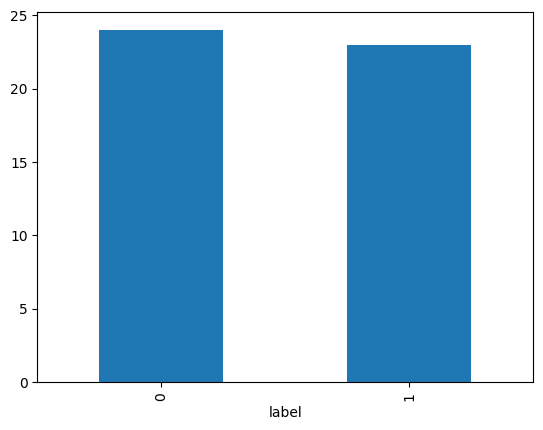

In [ ]:
df['label'].value_counts().plot.bar()

###Посмотрим на случайное изображение из датасета

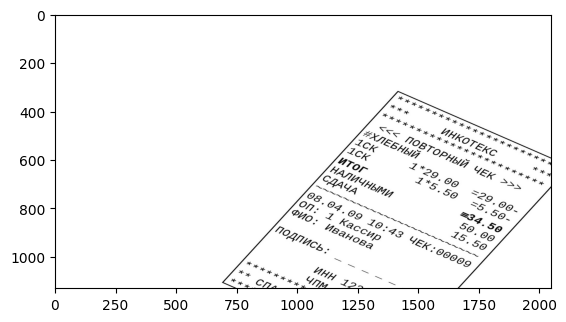

In [ ]:
sample = random.choice(filenames)
image = load_img("../content/Dataset/" + sample)
plt.imshow(image)

###Сформируем обучающую и проверочную выборку

Будем использовать image generator с class_mode = "categorical", нам нужно преобразовать категорию столбца в тип объекта - строка.

Затем imagenerator преобразует строки в one-hot encoding для решения задачи классификации.

Таким образом, мы будем конвертировать 1 в 'подпись' и 0 - в 'текст'.

In [ ]:
df["label"] = df["label"].replace({0: 'текст', 1: 'подпись'})

In [ ]:
# сформируем обучающую и проверочную выборку
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=78)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df

,filename,label
0,0008.jpeg,подпись
1,0021.jpeg,подпись
2,txt_st_0_8806.jpeg,текст
3,0001.jpeg,подпись
4,0019.jpeg,подпись
5,txt_st_0_549.jpeg,текст
6,txt_st_0_2385.jpeg,текст
7,txt_st_0_8140.jpeg,текст
8,txt_st_0_9826.jpeg,текст
9,0014.jpeg,подпись


In [ ]:
validate_df

,filename,label
0,0006.jpeg,подпись
1,0002.jpeg,подпись
2,0009.jpeg,подпись
3,0007.jpeg,подпись
4,0010.jpeg,подпись
5,txt_st_0_140.jpeg,текст
6,txt_st_0_9716.jpeg,текст
7,0018.jpeg,подпись
8,txt_st_0_6937.jpeg,текст
9,txt_st_0_8451.jpeg,текст


<Axes: xlabel='label'>

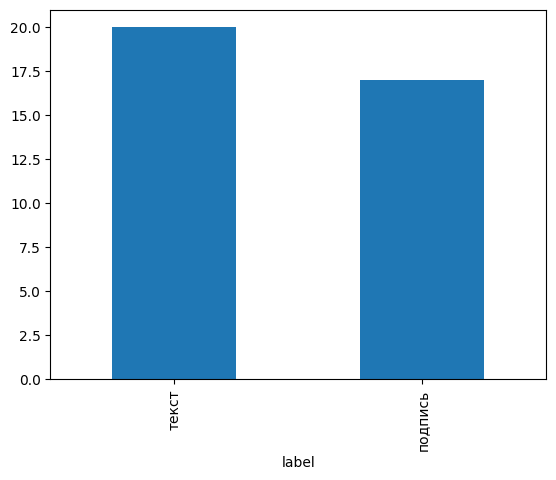

In [ ]:
# посмотрим на распределение обучающей выборки
train_df['label'].value_counts().plot.bar()

<Axes: xlabel='label'>

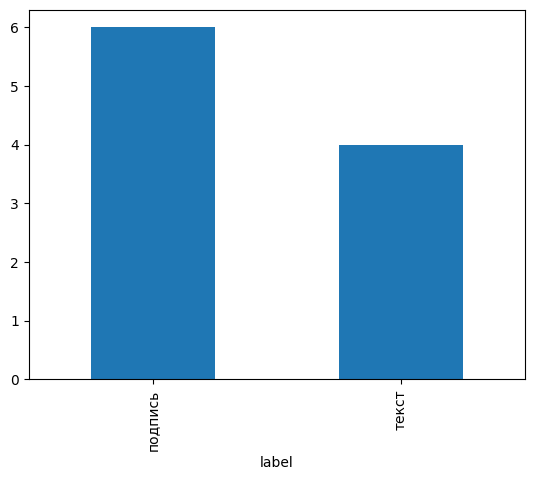

In [ ]:
# посмотрим на распределение проверочной выборки
validate_df['label'].value_counts().plot.bar()

In [ ]:
train_df.head()

,filename,label
0,0008.jpeg,подпись
1,0021.jpeg,подпись
2,txt_st_0_8806.jpeg,текст
3,0001.jpeg,подпись
4,0019.jpeg,подпись


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  37 non-null     object
 1   label     37 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [ ]:
# (число строк, число столбцов)
train_df.shape

(37, 2)

In [ ]:
# всего данных
train_df.size

74

In [ ]:
# число строк
len(train_df)

37

In [ ]:
# запишем количество данных для обучения и проверки в переменные
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
# определим batch_size
batch_size=15

In [ ]:
total_train

37

In [ ]:
total_validate

10

###ImageDataGenerator для обучающей и проверочной выборок
- Применим ImageDataGenerator для трансформации изображений для обучающей выборки

In [ ]:
# Определим константы
#FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../content/Dataset/",
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 37 validated image filenames belonging to 2 classes.


In [ ]:
# Применим ImageDataGenerator для трансформации изображений для проверочной выборки

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../content/Dataset/",
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 10 validated image filenames belonging to 2 classes.


####Посмотрим на пример трансформации изображения

In [ ]:
example_df = train_df.sample(n=2).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "../content/Dataset/",
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 2 validated image filenames belonging to 2 classes.


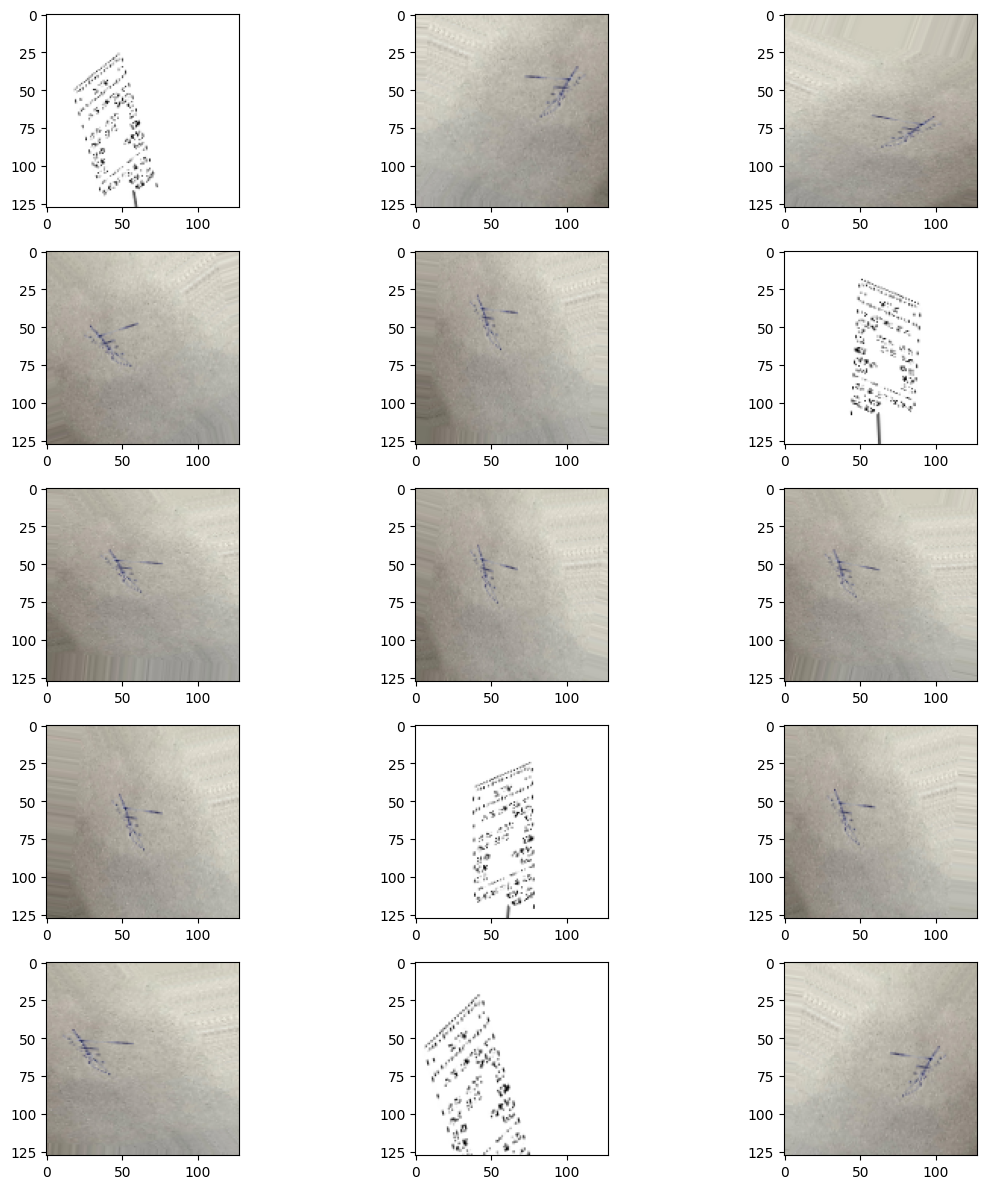

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15): # (0, 3) количество изображений
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        #print(X_batch[0])
        #print(Y_batch)
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

####Задание
1. Повторить блокнот с готовым датасетом Dataset.zip
2. Выполнить разметку и разделение выборок на обучающую и проверочную для своего датасета.